Progress:   9%|███▋                                     |  ETA: 0:03:31┌ Warning: DMRG maximum iterations
│   iter = 100
│   ϵ = 3.732177897174631e-11
│   λ = -32.673308679530635 + 9.265105248200615e-16im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/dmrg.jl:44
Progress:  10%|████                                     |  ETA: 0:04:11┌ Warning: DMRG maximum iterations
│   iter = 100
│   ϵ = 2.933026557730801e-11
│   λ = -32.76715750175887 + 1.5457749392707146e-16im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/dmrg.jl:44
Progress:  11%|████▌                                    |  ETA: 0:04:43┌ Warning: DMRG maximum iterations
│   iter = 100
│   ϵ = 6.594634727012797e-11
│   λ = -32.86277123350665 - 3.6569202763483055e-15im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/dmrg.jl:44
Progress:  12%|████▉                                    |  ETA: 0:05:09┌ Warning: DMRG maximum iterations
│   iter = 100
│   ϵ = 1.00126779851026

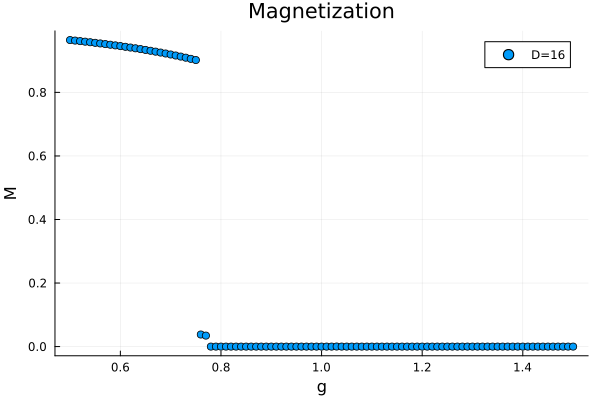

In [4]:
using MPSKit, MPSKitModels, TensorKit
using ProgressMeter, Plots # for demonstration purposes

L = 30 # length of the chain
D = 16 # bonddimension
init_state = FiniteMPS(L, ℂ^2, ℂ^D)

g_values = 0.5:0.01:1.5
Z = @mpoham sum(σᶻ(){i} for i in vertices(FiniteChain(L)))

M = @showprogress map(g_values) do g
    H = periodic_boundary_conditions(transverse_field_ising(; g=g), L)
    groundstate, environment, δ = find_groundstate(init_state, H; verbose=false)
    return abs(sum(expectation_value(groundstate, Z))) / L
end

scatter(g_values, M, xlabel="g", ylabel="M", label="D=$D", title="Magnetization")